In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
from sklearn.decomposition import PCA

In [5]:
from sklearn.cluster import KMeans

In [6]:
from sklearn.cluster import AgglomerativeClustering

In [7]:
df = pd.read_csv('/content/drive/MyDrive/covtype_train.csv')

In [8]:
df.head()

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,target
0,elevation_medium,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,0,1,low,22,0,2
1,elevation_high,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,1,1,mid,32,2,1
2,elevation_medium,aspect_low,slope_low,hillshade_9am_max,hillnoon_max,1,1,low,10,2,2
3,elevation_high,aspect_ultra,slope_medium,hillshade_9am_max,hillnoon_max,2,1,low,23,2,1
4,elevation_high,aspect_high,slope_low,hillshade_9am_max,hillnoon_max,2,1,mid,28,0,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           406708 non-null  object
 1   Aspect                              406708 non-null  object
 2   Slope                               406708 non-null  object
 3   Hillshade_9am                       406708 non-null  object
 4   Hillshade_Noon                      406708 non-null  object
 5   Horizontal_Distance_To_Hydrology    406708 non-null  int64 
 6   Vertical_Distance_To_Hydrology      406708 non-null  int64 
 7   Horizontal_Distance_To_Fire_Points  406708 non-null  object
 8   Soil_Type                           406708 non-null  int64 
 9   Wilderness                          406708 non-null  int64 
 10  target                              406708 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 34

In [10]:
print(f"Missing values in each variable: \n{df.isnull().sum()}")

Missing values in each variable: 
Elevation                             0
Aspect                                0
Slope                                 0
Hillshade_9am                         0
Hillshade_Noon                        0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Fire_Points    0
Soil_Type                             0
Wilderness                            0
target                                0
dtype: int64


In [11]:
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 394213


In [12]:
df1 = df.drop_duplicates()

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12495 entries, 0 to 406025
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Elevation                           12495 non-null  object
 1   Aspect                              12495 non-null  object
 2   Slope                               12495 non-null  object
 3   Hillshade_9am                       12495 non-null  object
 4   Hillshade_Noon                      12495 non-null  object
 5   Horizontal_Distance_To_Hydrology    12495 non-null  int64 
 6   Vertical_Distance_To_Hydrology      12495 non-null  int64 
 7   Horizontal_Distance_To_Fire_Points  12495 non-null  object
 8   Soil_Type                           12495 non-null  int64 
 9   Wilderness                          12495 non-null  int64 
 10  target                              12495 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.1+ MB


In [14]:
df1.groupby('target').size()

target
1    4112
2    4711
3    1056
4     175
5     597
6     686
7    1158
dtype: int64

In [15]:
labelencoder = LabelEncoder()

In [16]:
df1['Elevation'] = labelencoder.fit_transform(df1['Elevation'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df1['Aspect'] = labelencoder.fit_transform(df1['Aspect'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df1['Slope'] = labelencoder.fit_transform(df1['Slope'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df1['Hillshade_9am'] = labelencoder.fit_transform(df1['Hillshade_9am'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df1['Hillshade_Noon'] = labelencoder.fit_transform(df1['Hillshade_Noon'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df1['Horizontal_Distance_To_Fire_Points'] = labelencoder.fit_transform(df1['Horizontal_Distance_To_Fire_Points'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df1.head()

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,target
0,2,2,1,0,0,0,1,1,22,0,2
1,0,2,1,0,0,1,1,2,32,2,1
2,2,1,1,0,0,1,1,1,10,2,2
3,0,3,2,0,0,2,1,1,23,2,1
4,0,0,1,0,0,2,1,2,28,0,2


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12495 entries, 0 to 406025
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           12495 non-null  int64
 1   Aspect                              12495 non-null  int64
 2   Slope                               12495 non-null  int64
 3   Hillshade_9am                       12495 non-null  int64
 4   Hillshade_Noon                      12495 non-null  int64
 5   Horizontal_Distance_To_Hydrology    12495 non-null  int64
 6   Vertical_Distance_To_Hydrology      12495 non-null  int64
 7   Horizontal_Distance_To_Fire_Points  12495 non-null  int64
 8   Soil_Type                           12495 non-null  int64
 9   Wilderness                          12495 non-null  int64
 10  target                              12495 non-null  int64
dtypes: int64(11)
memory usage: 1.1 MB


In [24]:
x = df1.drop('target',axis=1)

In [25]:
y = df1['target']

In [26]:
pca = PCA(n_components=2).fit(x)

In [27]:
print(pca.components_)

[[ 6.44821468e-03 -3.17473325e-03 -1.21337096e-03  4.75547006e-04
  -4.09690762e-05 -2.56709040e-02 -4.84779251e-03 -8.77383658e-03
  -9.98929924e-01  3.64166373e-02]
 [-2.30603600e-01 -3.92698173e-02  1.36517227e-02 -1.01856863e-02
  -3.93844823e-03  9.17427568e-01  2.93166708e-01 -1.60494994e-03
  -2.16331659e-02  1.29936914e-01]]


In [28]:
print(pca.explained_variance_)

[131.3771612    1.78615692]


In [29]:
pca_2d = pca.transform(x)

### K_Means Clustering

In [30]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=10, n_init=10, random_state=0)
# Fit and predict 
y_means = kmeans.fit_predict(x)

In [102]:
import pickle

In [103]:
filename = 'final_model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

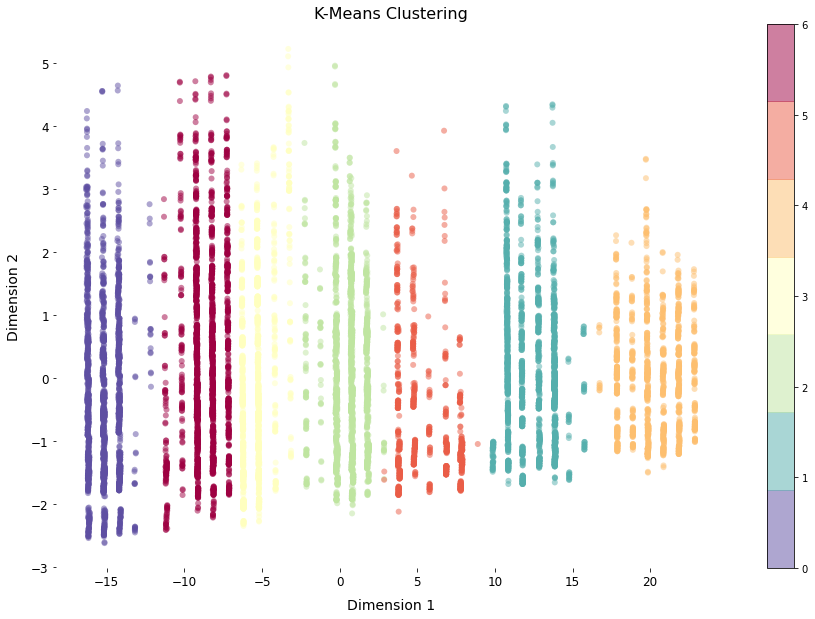

In [31]:
fig, ax = plt.subplots(figsize = (15, 10))

plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y_means,edgecolor="none",cmap=plt.cm.get_cmap("Spectral_r", 7),alpha=0.5)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Dimension 1", size = 14, labelpad=10)
plt.ylabel("Dimension 2", size = 14, labelpad=10)

plt.title('K-Means Clustering', size=16)
plt.colorbar(ticks=[0,1,2,3,4,5,6]);

plt.show()


In [32]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ['Elevation','Aspect','Slope','Hillshade_9am','Hillshade_Noon','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Fire_Points','Soil_Type','Wilderness'])
centroids.index_name = "ClusterID"
centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)
centroids

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,ClusterID
0,1.554033,1.639777,1.321157,0.030949,8.117707e-03,1.743278,1.526636,1.333841,37.976662,0.975647,0
1,1.176357,1.610950,1.281977,0.081395,1.550388e-02,1.257752,1.470930,1.078488,10.386143,1.816376,1
2,0.393574,1.609438,1.356928,0.032129,3.514056e-03,1.412651,1.263554,1.288655,22.187249,1.097892,2
3,0.650888,1.581657,1.297633,0.065089,1.597633e-02,1.530178,1.461538,1.161538,28.192308,0.244970,3
4,1.480474,1.437238,1.304045,0.041841,3.486750e-03,0.923989,1.464435,1.037657,2.552999,2.601116,4
5,0.842538,1.547591,1.213866,0.009401,-6.418477e-17,0.820212,1.030552,1.088132,17.340776,0.943596,5
6,0.702367,1.579623,1.334136,0.051344,9.626955e-03,1.849178,1.630566,1.314079,31.438428,1.801444,6


In [33]:
df10 = pd.DataFrame({'clusters' : kmeans.labels_, 'labels' : y})

In [34]:
df10['count'] = [1] * len(df1)

In [35]:
lcount= df10.groupby(['clusters','labels']).sum()
lcount

count
clusters labels       
0        1        1002
         2         155
         7         814
1        1         318
         2         973
         3         329
         4          35
         5         156
         6         250
         7           3
2        1         879
         2         959
         5          53
         6          20
         7          81
3        1         578
         2         890
         5         149
         7          73
4        1          11
         2         237
         3         665
         4         127
         5          62
         6         327
         7           5
5        1         306
         2         372
         3          48
         4          13
         5          64
         6          46
         7           2
6        1        1018
         2        1125
         3          14
         5         113
         6          43
         7         180

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


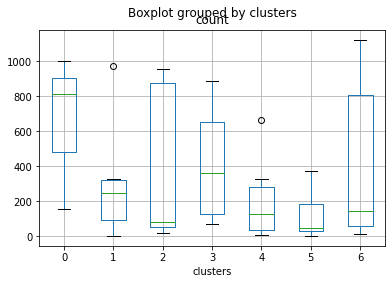

In [36]:
lcount.boxplot(by ='clusters', column =['count'], grid = True)

In [37]:
res=[]
for i in y_means:
  if i==0:
    res.append(1)
  elif i==4:
    res.append(3)
  else :
    res.append(2)

res

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [38]:
from sklearn.metrics import f1_score
f1_score(res,y.to_list(), average='weighted')

0.5686021732774544

In [39]:
kmeans.cluster_centers_

array([[ 1.55403349e+00,  1.63977676e+00,  1.32115677e+00,
         3.09487570e-02,  8.11770675e-03,  1.74327752e+00,
         1.52663623e+00,  1.33384069e+00,  3.79766616e+01,
         9.75646880e-01],
       [ 1.17635659e+00,  1.61094961e+00,  1.28197674e+00,
         8.13953488e-02,  1.55038760e-02,  1.25775194e+00,
         1.47093023e+00,  1.07848837e+00,  1.03861434e+01,
         1.81637597e+00],
       [ 3.93574297e-01,  1.60943775e+00,  1.35692771e+00,
         3.21285141e-02,  3.51405622e-03,  1.41265060e+00,
         1.26355422e+00,  1.28865462e+00,  2.21872490e+01,
         1.09789157e+00],
       [ 6.50887574e-01,  1.58165680e+00,  1.29763314e+00,
         6.50887574e-02,  1.59763314e-02,  1.53017751e+00,
         1.46153846e+00,  1.16153846e+00,  2.81923077e+01,
         2.44970414e-01],
       [ 1.48047420e+00,  1.43723849e+00,  1.30404463e+00,
         4.18410042e-02,  3.48675035e-03,  9.23988842e-01,
         1.46443515e+00,  1.03765690e+00,  2.55299861e+00,
         2.

### Agglomerative Clustering

In [40]:
AClus=AgglomerativeClustering(n_clusters=7)

In [41]:
y_AClus=AClus.fit_predict(x)

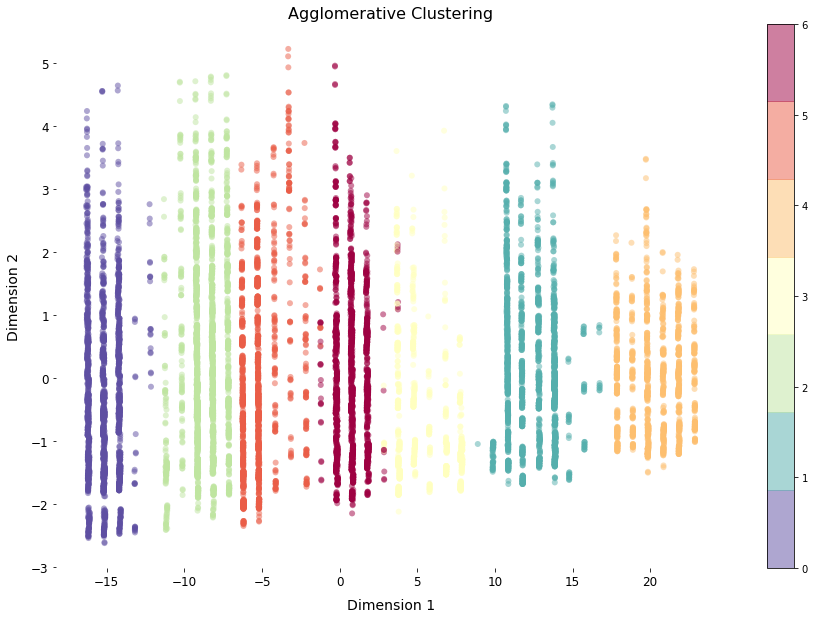

In [42]:
fig, ax = plt.subplots(figsize = (15, 10))

plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=y_AClus, 
            edgecolor="none", 
            cmap=plt.cm.get_cmap("Spectral_r", 7),
            alpha=0.5)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Dimension 1", size = 14, labelpad=10)
plt.ylabel("Dimension 2", size = 14, labelpad=10)

plt.title('Agglomerative Clustering', size=16)
plt.colorbar(ticks=[0,1,2,3,4,5,6]);

plt.show()


In [43]:
from sklearn.neighbors import NearestCentroid

In [44]:
clf = NearestCentroid()
clf.fit(x, y_AClus)
print(clf.centroids_)

[[1.55403349e+00 1.63977676e+00 1.32115677e+00 3.09487570e-02
  8.11770675e-03 1.74327752e+00 1.52663623e+00 1.33384069e+00
  3.79766616e+01 9.75646880e-01]
 [1.17003854e+00 1.61030829e+00 1.28034682e+00 8.09248555e-02
  1.54142582e-02 1.25770713e+00 1.46820809e+00 1.07755299e+00
  1.03646435e+01 1.80732177e+00]
 [7.02366627e-01 1.57962294e+00 1.33413558e+00 5.13437625e-02
  9.62695548e-03 1.84917770e+00 1.63056558e+00 1.31407942e+00
  3.14384276e+01 1.80144404e+00]
 [8.12941176e-01 1.54235294e+00 1.21411765e+00 9.41176471e-03
  0.00000000e+00 7.92941176e-01 1.02235294e+00 1.08823529e+00
  1.73529412e+01 9.49411765e-01]
 [1.49191848e+00 1.43640197e+00 1.30639494e+00 4.21644413e-02
  3.51370344e-03 9.20590302e-01 1.46802530e+00 1.03865074e+00
  2.52635278e+00 2.62122277e+00]
 [6.52100840e-01 1.56358543e+00 1.29915966e+00 6.16246499e-02
  1.51260504e-02 1.53501401e+00 1.44873950e+00 1.17871148e+00
  2.80173669e+01 3.33333333e-01]
 [3.92725356e-01 1.63046916e+00 1.35846073e+00 3.37374802e

In [45]:
centroids_Agg = pd.DataFrame(clf.centroids_, columns = ['Elevation','Aspect','Slope','Hillshade_9am','Hillshade_Noon','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Fire_Points','Soil_Type','Wilderness'])
centroids_Agg.index_name = "ClusterID"
centroids_Agg["ClusterID"] = centroids_Agg.index
centroids_Agg = centroids_Agg.reset_index(drop=True)
centroids_Agg

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,ClusterID
0,1.554033,1.639777,1.321157,0.030949,0.008118,1.743278,1.526636,1.333841,37.976662,0.975647,0
1,1.170039,1.610308,1.280347,0.080925,0.015414,1.257707,1.468208,1.077553,10.364644,1.807322,1
2,0.702367,1.579623,1.334136,0.051344,0.009627,1.849178,1.630566,1.314079,31.438428,1.801444,2
3,0.812941,1.542353,1.214118,0.009412,0.000000,0.792941,1.022353,1.088235,17.352941,0.949412,3
4,1.491918,1.436402,1.306395,0.042164,0.003514,0.920590,1.468025,1.038651,2.526353,2.621223,4
5,0.652101,1.563585,1.299160,0.061625,0.015126,1.535014,1.448739,1.178711,28.017367,0.333333,5
6,0.392725,1.630469,1.358461,0.033737,0.003690,1.414866,1.269373,1.278861,22.047443,1.053769,6


In [46]:
df11 = pd.DataFrame({'clusters' : y_AClus, 'labels' : y})

In [47]:
df11['count'] = [1] * len(df1)

In [48]:
lcountagg= df11.groupby(['clusters','labels']).sum()
lcountagg

count
clusters labels       
0        1        1002
         2         155
         7         814
1        1         318
         2         984
         3         329
         4          35
         5         156
         6         251
         7           3
2        1        1018
         2        1125
         3          14
         5         113
         6          43
         7         180
3        1         303
         2         374
         3          48
         4          13
         5          64
         6          45
         7           3
4        1          11
         2         226
         3         665
         4         127
         5          62
         6         327
         7           5
5        1         588
         2         963
         5         161
         7          73
6        1         872
         2         884
         5          41
         6          20
         7          80

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


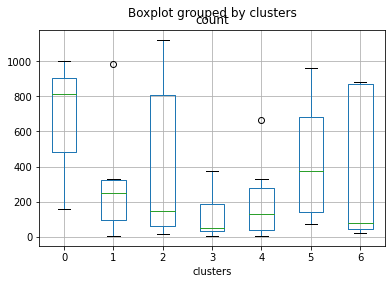

In [49]:
lcountagg.boxplot(by ='clusters', column =['count'], grid = True)

In [50]:
res3=[]
for i in y_AClus:
  if i==6:
    res3.append(1)
  elif i==4:
    res3.append(3)
  elif i==0:
    res3.append(1)
  else :
    res3.append(2)

res3

[1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 3,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,


In [51]:
f1_score(res3,y.to_list(), average='weighted')

0.539988987672497

## Spectral Clustering

In [52]:
from sklearn.cluster import SpectralClustering
sp_cls = SpectralClustering(n_clusters = 7, random_state=0)
y_sp_cls = sp_cls.fit_predict(x)

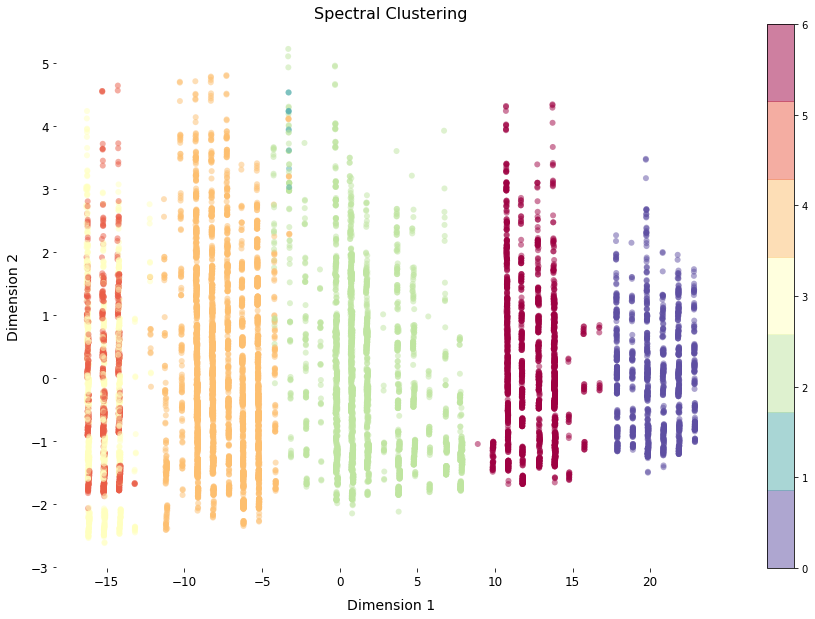

In [53]:
fig, ax = plt.subplots(figsize = (15, 10))

plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=y_sp_cls, 
            edgecolor="none", 
            cmap=plt.cm.get_cmap("Spectral_r", 7),
            alpha=0.5)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Dimension 1", size = 14, labelpad=10)
plt.ylabel("Dimension 2", size = 14, labelpad=10)

plt.title('Spectral Clustering', size=16)
plt.colorbar(ticks=[0,1,2,3,4,5,6]);

plt.show()


In [54]:
clf1 = NearestCentroid()
clf1.fit(x, y_sp_cls)
print(clf1.centroids_)

[[1.49191848e+00 1.43640197e+00 1.30639494e+00 4.21644413e-02
  3.51370344e-03 9.20590302e-01 1.46802530e+00 1.03865074e+00
  2.52635278e+00 2.62122277e+00]
 [3.00000000e+00 0.00000000e+00 1.80000000e+00 0.00000000e+00
  0.00000000e+00 5.70000000e+00 3.00000000e+00 2.00000000e+00
  2.60000000e+01 2.00000000e+00]
 [5.10725230e-01 1.58971740e+00 1.32482125e+00 2.92815798e-02
  2.38338441e-03 1.29315628e+00 1.24174328e+00 1.22812394e+00
  2.09182840e+01 1.08171604e+00]
 [3.00000000e+00 1.58374143e+00 1.29872674e+00 2.84035260e-02
  8.81488737e-03 1.95396670e+00 1.62879530e+00 1.37120470e+00
  3.80763957e+01 1.04897160e+00]
 [6.89899731e-01 1.58376131e+00 1.31107850e+00 5.47811201e-02
  1.24724872e-02 1.68158474e+00 1.53338225e+00 1.25091709e+00
  3.02394228e+01 1.15358278e+00]
 [0.00000000e+00 1.70713525e+00 1.34398296e+00 3.40788072e-02
  7.45473908e-03 1.51011715e+00 1.41320554e+00 1.29712460e+00
  3.79030884e+01 8.83919063e-01]
 [1.17003854e+00 1.61030829e+00 1.28034682e+00 8.09248555e

In [55]:
centroids_spec = pd.DataFrame(clf1.centroids_, columns = ['Elevation','Aspect','Slope','Hillshade_9am','Hillshade_Noon','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Fire_Points','Soil_Type','Wilderness'])
centroids_spec.index_name = "ClusterID"
centroids_spec["ClusterID"] = centroids_spec.index
centroids_spec = centroids_spec.reset_index(drop=True)
centroids_spec

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,ClusterID
0,1.491918,1.436402,1.306395,0.042164,0.003514,0.920590,1.468025,1.038651,2.526353,2.621223,0
1,3.000000,0.000000,1.800000,0.000000,0.000000,5.700000,3.000000,2.000000,26.000000,2.000000,1
2,0.510725,1.589717,1.324821,0.029282,0.002383,1.293156,1.241743,1.228124,20.918284,1.081716,2
3,3.000000,1.583741,1.298727,0.028404,0.008815,1.953967,1.628795,1.371205,38.076396,1.048972,3
4,0.689900,1.583761,1.311079,0.054781,0.012472,1.681585,1.533382,1.250917,30.239423,1.153583,4
5,0.000000,1.707135,1.343983,0.034079,0.007455,1.510117,1.413206,1.297125,37.903088,0.883919,5
6,1.170039,1.610308,1.280347,0.080925,0.015414,1.257707,1.468208,1.077553,10.364644,1.807322,6


In [56]:
df12 = pd.DataFrame({'clusters' : y_sp_cls, 'labels' : y})

In [57]:
df12['count'] = [1] * len(df1)

In [58]:
lcountspec= df12.groupby(['clusters','labels']).sum()
lcountspec

count
clusters labels       
0        1          11
         2         226
         3         665
         4         127
         5          62
         6         327
         7           5
1        2           5
         7           5
2        1        1219
         2        1391
         3          48
         4          13
         5         117
         6          65
         7          84
3        1         456
         2          30
         7         535
4        1        1565
         2        1958
         3          14
         5         262
         6          43
         7         247
5        1         543
         2         117
         7         279
6        1         318
         2         984
         3         329
         4          35
         5         156
         6         251
         7           3

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


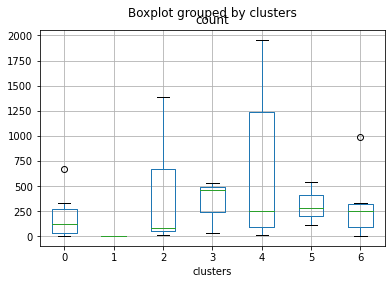

In [59]:
lcountspec.boxplot(by ='clusters', column =['count'], grid = True)

In [60]:
res2=[]
for i in y_sp_cls:
  if i==5:
    res2.append(1)
  elif i==3:
    res2.append(7)
  elif i==1:
    res2.append(7)
  elif i==0:
    res2.append(3)
  else :
    res2.append(2)

res2

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 7,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 7,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 7,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 7,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 7,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 7,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [61]:
f1_score(res2,y.to_list(), average='weighted')

0.5749839058331327

### Gaussian Based Modelling (Gaussian Mixture)

In [62]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=7, covariance_type = 'spherical',random_state=0).fit(x)
gm_means = gm.fit_predict(x)


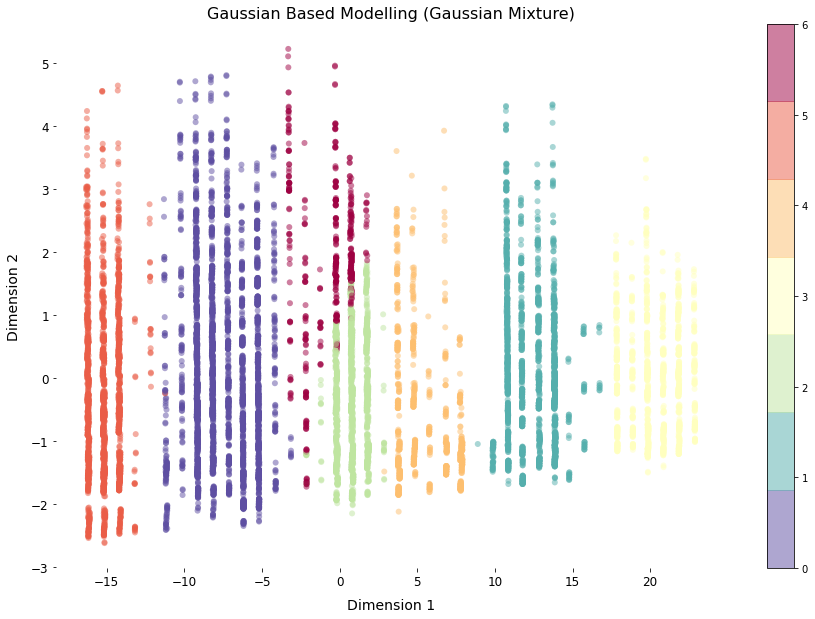

In [63]:
fig, ax = plt.subplots(figsize = (15, 10))

plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=gm_means, 
            edgecolor="none", 
            cmap=plt.cm.get_cmap("Spectral_r", 7),
            alpha=0.5)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Dimension 1", size = 14, labelpad=10)
plt.ylabel("Dimension 2", size = 14, labelpad=10)

plt.title('Gaussian Based Modelling (Gaussian Mixture)', size=16)
plt.colorbar(ticks=[0,1,2,3,4,5,6]);

plt.show()


In [64]:
gm.means_

array([[6.63322431e-01, 1.58073042e+00, 1.31128136e+00, 5.69002897e-02,
        1.25215099e-02, 1.68047394e+00, 1.54221729e+00, 1.24634961e+00,
        3.01751966e+01, 1.16145978e+00],
       [1.17138904e+00, 1.61070977e+00, 1.28072068e+00, 8.10324067e-02,
        1.54347763e-02, 1.25794739e+00, 1.46883135e+00, 1.07768222e+00,
        1.03687966e+01, 1.80910368e+00],
       [4.33819006e-01, 1.62312140e+00, 1.36310035e+00, 3.90876110e-02,
        4.55974791e-03, 9.63180603e-01, 1.15415669e+00, 1.28294665e+00,
        2.19783055e+01, 9.80088002e-01],
       [1.48948129e+00, 1.43628905e+00, 1.30589441e+00, 4.20955615e-02,
        3.50796347e-03, 9.21172706e-01, 1.46726072e+00, 1.03854969e+00,
        2.53202725e+00, 2.61694074e+00],
       [8.40643424e-01, 1.54792746e+00, 1.21372182e+00, 9.70409023e-03,
        4.79866690e-09, 8.19586692e-01, 1.03044854e+00, 1.08795873e+00,
        1.73447903e+01, 9.44193129e-01],
       [1.57538015e+00, 1.63838352e+00, 1.31928095e+00, 3.04527151e-02,
   

In [65]:
centroids_gm = pd.DataFrame(gm.means_, columns = ['Elevation','Aspect','Slope','Hillshade_9am','Hillshade_Noon','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Fire_Points','Soil_Type','Wilderness'])
centroids_gm.index_name = "ClusterID"
centroids_gm["ClusterID"] = centroids_gm.index
centroids_gm = centroids_gm.reset_index(drop=True)
centroids_gm

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,ClusterID
0,0.663322,1.580730,1.311281,0.056900,1.252151e-02,1.680474,1.542217,1.246350,30.175197,1.161460,0
1,1.171389,1.610710,1.280721,0.081032,1.543478e-02,1.257947,1.468831,1.077682,10.368797,1.809104,1
2,0.433819,1.623121,1.363100,0.039088,4.559748e-03,0.963181,1.154157,1.282947,21.978306,0.980088,2
3,1.489481,1.436289,1.305894,0.042096,3.507963e-03,0.921173,1.467261,1.038550,2.532027,2.616941,3
4,0.840643,1.547927,1.213722,0.009704,4.798667e-09,0.819587,1.030449,1.087959,17.344790,0.944193,4
5,1.575380,1.638384,1.319281,0.030453,7.987597e-03,1.739030,1.525830,1.335425,37.912893,0.969285,5
6,0.329588,1.565596,1.402810,0.018729,1.113480e-05,3.063011,1.777951,1.335717,23.339173,1.563111,6


In [66]:
df13 = pd.DataFrame({'clusters' : gm_means, 'labels' : y})

In [67]:
df13['count'] = [1] * len(df1)

In [68]:
lcountgm= df13.groupby(['clusters','labels']).sum()
lcountgm

count
clusters labels       
0        1        1570
         2        1970
         3          14
         5         262
         6          43
         7         243
1        1         318
         2         984
         3         329
         4          35
         5         156
         6         251
         7           3
2        1         705
         2         738
         5          41
         6          19
         7          71
3        1          11
         2         226
         3         665
         4         127
         5          62
         6         327
         7           5
4        1         305
         2         372
         3          48
         4          13
         5          64
         6          45
         7           2
5        1        1003
         2         155
         7         815
6        1         200
         2         266
         5          12
         6           1
         7          19

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


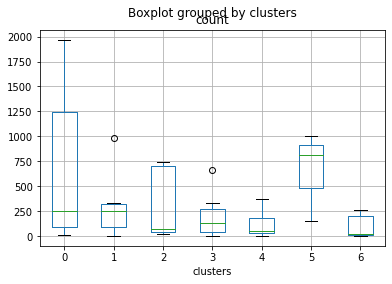

In [69]:
lcountgm.boxplot(by ='clusters', column =['count'], grid = True)

In [70]:
res1=[]
for i in gm_means:
  if i==5:
    res1.append(1)
  elif i==3:
    res1.append(3)
  else :
    res1.append(2)

res1

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [71]:
f1_score(res1,y.to_list(), average='weighted')

0.5698032655484473

In [72]:
# Selecting best model using train test validation.


In [73]:
#train test set
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
X.head()

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness
0,2,2,1,0,0,0,1,1,22,0
1,0,2,1,0,0,1,1,2,32,2
2,2,1,1,0,0,1,1,1,10,2
3,0,3,2,0,0,2,1,1,23,2
4,0,0,1,0,0,2,1,2,28,0


In [74]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,test_size=0.2, random_state=1)

In [75]:
from sklearn.cluster import SpectralClustering
spec = SpectralClustering(n_clusters = 7, random_state=0)
y_spec = spec.fit_predict(X_train)

In [76]:
df_sk = pd.DataFrame({'clusters' : y_spec, 'labels' : y_train})
df_sk

,clusters,labels
213562,1,1
63899,3,1
2369,0,2
90096,0,2
249123,4,2
...,...,...
86,6,3
913,3,1
5332,3,1
121,0,2


In [77]:
df_sk['count'] = [1] * len(X_train)
df_sk

,clusters,labels,count
213562,1,1,1
63899,3,1,1
2369,0,2,1
90096,0,2,1
249123,4,2,1
...,...,...,...
86,6,3,1
913,3,1,1
5332,3,1,1
121,0,2,1


In [78]:
lcountspec= df_sk.groupby(['clusters','labels']).sum()
lcountspec

count
clusters labels       
0        1         246
         2         803
         3         268
         4          30
         5         127
         6         198
         7           2
1        1         368
         2          26
         7         425
2        2           3
         7           4
3        1        1287
         2        1565
         3          10
         5         209
         6          28
         7         198
4        1         952
         2        1107
         3          38
         4          11
         5          97
         6          58
         7          65
5        1         426
         2          91
         7         227
6        1          10
         2         174
         3         529
         4          99
         5          45
         6         265
         7           5

In [79]:
res2=[]
for i in y_spec:
  if i==5:
    res2.append(1)
  elif i==6:
    #res2.append(7)
    res2.append(3)
  elif i==0:
    #res2.append(3)
    res2.append(7)
  else :
    res2.append(2)


In [80]:
from sklearn.metrics import f1_score
f1_score(res2,y_train.to_list(), average='weighted')

0.4175883400456276

In [81]:
y_test_spec = spec.fit_predict(X_val)


#y_spec_val = spec.fit_predict(X_val)

In [82]:
res2=[]
for i in y_test_spec:
  if i==5:
    res2.append(1)
  elif i==6:
    #res2.append(7)
    res2.append(3)
  elif i==0:
    #res2.append(3)
    res2.append(7)
  else :
    res2.append(2)


In [83]:
from sklearn.metrics import f1_score
f1_score(res2,y_val.to_list(), average='weighted')

0.23808177969971975

In [84]:
#Validatiing performance of guassian mixture on test set.
from sklearn.mixture import GaussianMixture
gm1 = GaussianMixture(n_components=7, covariance_type = 'spherical',random_state=0).fit(X_train)
y_gm_train = gm1.fit_predict(X_train)



In [85]:
df_gm = pd.DataFrame({'clusters' : y_gm_train, 'labels' : y_train})
df_gm

,clusters,labels
213562,2,1
63899,5,1
2369,1,2
90096,1,2
249123,3,2
...,...,...
86,4,3
913,0,1
5332,5,1
121,1,2


In [86]:
df_gm['count'] = [1] * len(X_train)
df_gm

,clusters,labels,count
213562,2,1,1
63899,5,1,1
2369,1,2,1
90096,1,2,1
249123,3,2,1
...,...,...,...
86,4,3,1
913,0,1,1
5332,5,1,1
121,1,2,1


In [87]:
lcountspec= df_gm.groupby(['clusters','labels']).sum()
lcountspec

count
clusters labels       
0        1         448
         2         714
         5         121
         7          58
1        1         246
         2         803
         3         268
         4          30
         5         127
         6         198
         7           2
2        1         797
         2         124
         7         652
3        1         684
         2         757
         5          46
         6          18
         7          63
4        1          10
         2         174
         3         529
         4          99
         5          45
         6         265
         7           5
5        1         858
         2         896
         3          10
         5          88
         6          28
         7         145
6        1         246
         2         301
         3          38
         4          11
         5          51
         6          40
         7           1

In [88]:
res2=[]
for i in y_gm_train:
  if i==3:
    res2.append(1)
  elif i==4:
    #res2.append(7)
    res2.append(3)
  else :
    res2.append(2)


In [89]:
from sklearn.metrics import f1_score
f1_score(res2,y_train.to_list(), average='weighted')

0.47916940951150133

In [90]:
y_gm_val = gm1.fit_predict(X_val)

In [91]:
res2=[]
for i in y_gm_val:
  if i==3:
    res2.append(1)
  elif i==4:
    #res2.append(7)
    res2.append(3)
  else :
    res2.append(2)


In [92]:
from sklearn.metrics import f1_score
f1_score(res2,y_val.to_list(), average='weighted')

0.30820384991323385

In [93]:
km1 = KMeans(n_clusters=7, init='k-means++', max_iter=10, n_init=10, random_state=0)
# Fit and predict 
y_km_train = km1.fit_predict(X_train)

In [94]:
df_km = pd.DataFrame({'clusters' : y_km_train, 'labels' : y_train})
df_km
df_km['count'] = [1] * len(X_train)
df_km

,clusters,labels,count
213562,2,1,1
63899,5,1,1
2369,1,2,1
90096,1,2,1
249123,3,2,1
...,...,...,...
86,4,3,1
913,0,1,1
5332,5,1,1
121,1,2,1


In [95]:
lcountspec= df_km.groupby(['clusters','labels']).sum()
lcountspec

count
clusters labels       
0        1         448
         2         714
         5         121
         7          58
1        1         246
         2         793
         3         268
         4          30
         5         127
         6         198
         7           2
2        1         797
         2         124
         7         652
3        1         684
         2         757
         5          46
         6          18
         7          63
4        1          10
         2         184
         3         529
         4          99
         5          45
         6         265
         7           5
5        1         858
         2         896
         3          10
         5          88
         6          28
         7         145
6        1         246
         2         301
         3          38
         4          11
         5          51
         6          40
         7           1

In [96]:
res2=[]
for i in y_km_train:
  if i==2:
    res2.append(1)
  elif i==4:
    #res2.append(7)
    res2.append(3)
  else :
    res2.append(2)


In [97]:
from sklearn.metrics import f1_score
f1_score(res2,y_train.to_list(), average='weighted')

0.5686986833078069

In [98]:
y_km_val = km1.fit_predict(X_val)

In [99]:
res2=[]
for i in y_km_val:
  if i==2:
    res2.append(1)
  elif i==4:
    #res2.append(7)
    res2.append(3)
  else :
    res2.append(2)


In [100]:
from sklearn.metrics import f1_score
f1_score(res2,y_val.to_list(), average='weighted')

0.5682288662660515